## AI-HDX prediction
The Colab ipynb allows users to execute the AI-HDX model online with your own protein sequence. This version accepts one protein sequence at a time. 
### Data pre-processing
Two inputs tables are required to run this program and please follow the [data pre-processing](https://github.com/joshuayuanlab151/Seq2HDX) to prepare your input tables. 

Two input tables.       


*   Embedding vector `protein.vector.txt`. Each row contains the embedding features of one amino acid in a protein. The amino acid position and protein length should be the same as what you use to create peptide fragments.
```
1       A       0.7358490566037735      -0.617314295    -1.089185948    -0.926272767    1.486725101     0.24679532899999998     7.09302729861882        10.0    9.28971707501478        9.337021486478037             10.0    7.365279704347391       10.0    10.0    10.0    10.0    10.0    10.0    10.0    8.783609968943882       10.0    7.280002015999065       8.450115895665682       10.0    10.0    10.0    5.964030583209426     7.146344167107368       8.065895013134284       6.170392186585261       6.279658184901517       10.0    10.0    7.604230019887311       6.271477663131956       5.0
2       S       0.823076923076923       0.026690504     0.97089611      -0.8436740090000001     0.9963095740000001      0.110544377     8.297702697724748       10.0    6.73267295119654        9.343798356658402     10.0    8.271411511314541       9.621667708642791       10.0    9.737630684887721       10.0    10.0    7.6932434097818 9.371150975102958       10.0    9.262866621926072       8.392960968875936             9.407270507272811       10.0    10.0    10.0    5.217362915633222       8.43036902195414        9.511538377416292       5.693010435855571       6.942363401080304       5.430183807243099       7.532460039491867     9.329241605105182       6.326262306609193       6.256265970868344
3       I       0.15384615384615385     -1.261786099    -0.592097155    1.012212402     0.45251484799999997     0.025312684     9.693799019988838       10.0    9.05979173309898        9.714463147834625             9.6272697565057 5.7077161189449175      9.870099956354897       8.809020315885116       9.855570413443004       9.518001877443082       10.0    9.003841305264624       9.35354070409281        8.997094134840536     10.0    9.645657796146146       9.162919586743056       9.743193166062767       10.0    10.0    5.021249872058216       9.751200904332315       9.764201398332677       6.05515425456685              6.409523482283048       5.589742145184536       7.146344167107368       9.311826787372903       6.238683139895791       6.248064744684293
```

*   List item `peptide fragments.csv`. Save the peptide fragments into a .csv file with start position, stop position, sequence like this:
```
8,21,DSASSPPYSVNQNL
8,21,DSASSPPYSVNQNL
34,45,YVDKLSSSGASW
34,45,YVDKLSSSGASW
46,60,HTEWTWSGGEGTVKS
46,68,HTEWTWSGGEGTVKSYSNSGVTF
```

Now we are ready to run AI-HDX!

### Download pre-trained models and confidence index score
Ten deep learning models trained by 10 different sets of training data which are randomly split 10 times from the same database. The 10 models will predict HDX rates independently and compute an average HDX rate and a standard deviation for each peptide fragment. A confidence index score which estimates the confidence of the prediction is assigned based on the average predicted HDX rate. 

In [ ]:
## Download the models from github repo
%%bash
wget https://github.com/Environmentalpublichealth/AI-HDX/raw/main/models.zip
unzip /content/models.zip

In [5]:
## Load the pre-trained Neural Network models
import tensorflow as tf
root_dir = '/home/lwang/AI-HDX-main/models'
model1 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m1")
model2 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m2")
model3 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m3")
model4 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m4")
model5 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m5")
model6 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m6")
model7 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m7")
model8 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m8")
model9 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m9")
model10 = tf.keras.models.load_model(f"{root_dir}/NNmodel_m10")

#model1.summary()

2024-04-09 14:22:45.854073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_reversev2_grad_reversev2_reversev2_axis' with dtype int32 and shape [1]
	 [[{{node gradients_reversev2_grad_reversev2_reversev2_axis}}]]
2024-04-09 14:22:45.856585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2024-04-09 14:22:45.856727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

In [9]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_11 (Reshape)        (None, 30, 36, 1)         0         
                                                                 
 masking_6 (Masking)         (None, 30, 36, 1)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 36, 10)        260       
                                                                 
 batch_normalization_6 (Batc  (None, 30, 36, 10)       40        
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 36, 20)        9820      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 34, 20)       0         
 2D)                                                  

In [2]:
## Load the pre-trained confidence index score based on the error rate between predictions and ground true in validation sets
confidx = [0.435003467810392,0.584915875217703,0.691762575882027,0.707836210244849,0.626804716837474,0.591011203879881,0.532705643129479,0.426545116775042,0.251348832172361,0.36508649008649]

In [42]:
import os
import pandas as pd
import torch
from pepGraph_basemodel_training import base_data, test_basemodel
import tensorflow as tf
import random

##################################### initial setting ##################################### 
root_dir = "/home/lwang/models/HDX_LSTM/data/COVID_SPIKE"
HDX_summary_file = f'{root_dir}/COVID_record.xlsx'
hdx_df = pd.read_excel(HDX_summary_file, sheet_name='Sheet1')
hdx_df = hdx_df.dropna(subset=['chain_identifier'])

dssp_dir = os.path.join(root_dir, 'dssp_files')
hhm_dir = os.path.join(root_dir, 'hhm_files')
rigidity_dir = os.path.join(root_dir, 'rigidity_files')
proflex_dir = os.path.join(root_dir, 'proflex_files')
embedding_dir = os.path.join(root_dir, 'embedding_files')
HDX_dir = os.path.join(root_dir, 'HDX_files')

result_dir = '/home/lwang/models/HDX_LSTM/data/COVID_SPIKE'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
##################################### initial setting ##################################### 
    
device = torch.device('cpu')
print(device)

### data preparation ###
hdx_df = hdx_df[hdx_df['apo_identifier'] == 'Omicron_spike.pdb']
input_apo, truth_apo, input_complex, truth_complex, range_list = base_data(hdx_df, root_dir)

print('length of input_data:', len(input_apo)+len(input_complex))
input_apo = tf.convert_to_tensor(input_apo, dtype=tf.float32)
truth_apo = tf.convert_to_tensor(truth_apo, dtype=tf.float32)
input_complex = tf.convert_to_tensor(input_complex, dtype=tf.float32)
truth_complex = tf.convert_to_tensor(truth_complex, dtype=tf.float32)

cpu
COVID_SPIKE Omicron_spike A
after filtering: (408, 12)
current shape: (136, 12)
Sequence mismatch at index 62: YSFRPTYGVGHQPYRV != YGFRPTYGVGHQPYRV
Sequence mismatch at index 63: YSFRPTYGVGHQPYRVVV != YGFRPTYGVGHQPYRVVV
Sequence mismatch at index 80: ASYQTQTKSHGSASSVASQSIIA != ASYQTSQSIIA
Sequence mismatch at index 81: QTQTKSHGSASSVASQSIIA != QTSQSIIA
Sequence mismatch at index 108: NSAIGKIQDSLSSTASAL != NSAIGKIQDSLSSTPSAL
Sequence mismatch at index 109: SSTASALGKLQDVVNHNAQALNT != SSTPSALGKLQDVVNHNAQALNT
Sequence mismatch at index 123: FKEEL != 
Sequence mismatch at index 124: GDISGIN != 
Sequence mismatch at index 125: GDISGINA != 
Sequence mismatch at index 126: ASVVNIQKEIDRLNE != 
Sequence mismatch at index 127: SVVNIQKEIDRL != 
Sequence mismatch at index 128: SVVNIQKEIDRLNE != 
Sequence mismatch at index 129: NEVAKNLNESL != 
Sequence mismatch at index 130: QELGKYEQ != 
Sequence mismatch at index 131: QELGKYEQYIKGSGYIPEAPRDGQ != 
Sequence mismatch at index 132: YIKGSGYIPEAPRDGQA

In [43]:
print(input_complex[0, 0, :])
print(range_list)
input_data = input_complex
truth_data = truth_complex

tf.Tensor(
[ 0.17766498  1.          0.          0.          0.          9.097429
 10.          9.001596   10.          8.7588215   8.807446   10.
 10.          7.294828    9.470749   10.          8.131333    9.355051
  9.423779    9.843036    7.7660666   9.256009    8.567432   10.
  9.092078    5.         10.         10.         10.         10.
 10.         10.          8.695516    5.          5.         -1.006
 -0.59        1.891      -0.397       0.412      -0.37        1.
  0.          0.          0.          3.2552724   0.18040061  0.43333334], shape=(48,), dtype=float32)
[array([19, 31]), array([32, 42]), array([32, 43]), array([32, 48]), array([49, 54]), array([49, 56]), array([ 90, 101]), array([ 91, 101]), array([ 92, 101]), array([ 95, 104]), array([105, 115]), array([105, 116]), array([109, 115]), array([109, 116]), array([172, 181]), array([172, 186]), array([175, 186]), array([187, 194]), array([187, 195]), array([187, 196]), array([197, 206]), array([197, 217]), array([23

In [44]:
import numpy as np
import random
'''
def random_sampling(input, truth, num_samples):
    random_items = random.sample(list(zip(input, truth)), num_samples)
    random_input, random_truth = zip(*random_items)
    random_input = tf.convert_to_tensor(random_input, dtype=tf.float32)
    random_truth = tf.convert_to_tensor(random_truth, dtype=tf.float32)
    return random_input, random_truth

random_input_apo, random_truth_apo = random_sampling(input_apo, truth_apo, 955)
random_input_complex, random_truth_complex = random_sampling(input_complex, truth_complex, 513)

input_data = tf.concat([random_input_apo, random_input_complex], axis=0)
truth_data = tf.concat([random_truth_apo, random_truth_complex], axis=0)
'''
def extract_feature(input_data):
    SASA = input_data[:, :, 0:1]
    HHblits = input_data[:, :, 5:35]
    HDMD = input_data[:, :, 35:40]
    ori_input = np.concatenate((SASA, HDMD, HHblits), axis=2)
    ori_input = np.transpose(ori_input, (0, 2, 1))
    return ori_input

ori_input = extract_feature(input_data)
truth_data = truth_data
print('ori_input transpose shape:', ori_input.shape)

ori_input transpose shape: (117, 36, 30)


### Run AI-HDX prediction
The script takes the 10 pre-trained models and predict 10 HDX rates for each peptide. An average HDX rate and a standard deviation of predicted HDX rate is computed and output into a new data frame. A confidence score to estimate the prediction confidence is calculated for each peptide and output to the data frame.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# get predictions from the 10 models randomly trained by different training sets and validation sets
x_test = tf.reshape(ori_input, (ori_input.shape[0], ori_input.shape[2], ori_input.shape[1], 1))
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
colnames = ["model1","model2","model3","model4", "model5","model6","model7","model8","model9", "model10"]
out_pred = []
for idx, model in enumerate(models):
  y_pred = model.predict(x_test)
  out_pred.append(y_pred)

out_df = np.concatenate(out_pred, axis=1)
print(out_df.shape)

4/4 [==============================] - 0s 33ms/step
(117, 10)


Spearman correlation: 0.016
PCC: -0.03477029679821863
RMSE: 0.19230251
MSE: 0.036980253


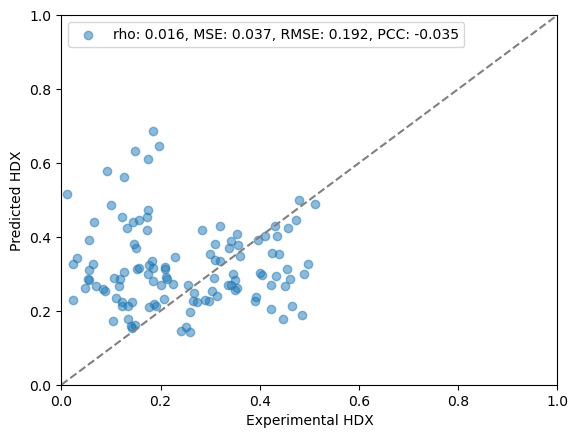

In [46]:
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_squared_error

mean_pred = np.mean(out_df, axis=1)
mse = mean_squared_error(truth_data, mean_pred)
rmse = mean_squared_error(truth_data, mean_pred, squared=False)
pcc = pearsonr(truth_data, mean_pred)
spearman_corr, _ = spearmanr(truth_data, mean_pred)
print('Spearman correlation: %.3f' % spearman_corr)
print('PCC:', pcc[0])
print('RMSE:', rmse)
print('MSE:', mse)

### plot ###
plt.figure()
plt.scatter(truth_data, mean_pred, alpha=0.5)
plt.xlabel('Experimental HDX')
plt.ylabel('Predicted HDX')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], '--', color='gray')  # Add diagonal dashed line
# BEGIN: Modified code
plt.legend(['rho: {:.3f}, MSE: {:.3f}, RMSE: {:.3f}, PCC: {:.3f}'.format(spearman_corr, mse, rmse, pcc[0])])
# END: Modified code
plt.show()

In [ ]:
# calculate average prediction values(mean) and standard deviation(SD)
out_df["average"] = out_df[colnames].mean(axis=1)
out_df["SD"] = out_df[colnames].std(axis=1)

# add CI score to each prediction
def pred_range(a):
  for i in range(0,10):
    if a >i*0.1 and a <= (i+1)*0.1:
      CI = confidx[i]
      return CI
scores=[]
for idx, pred in enumerate(out_df["average"]):
  conf_score = pred_range(pred)
  scores.append(conf_score)
  
out_df["CI"]=np.array(scores) 

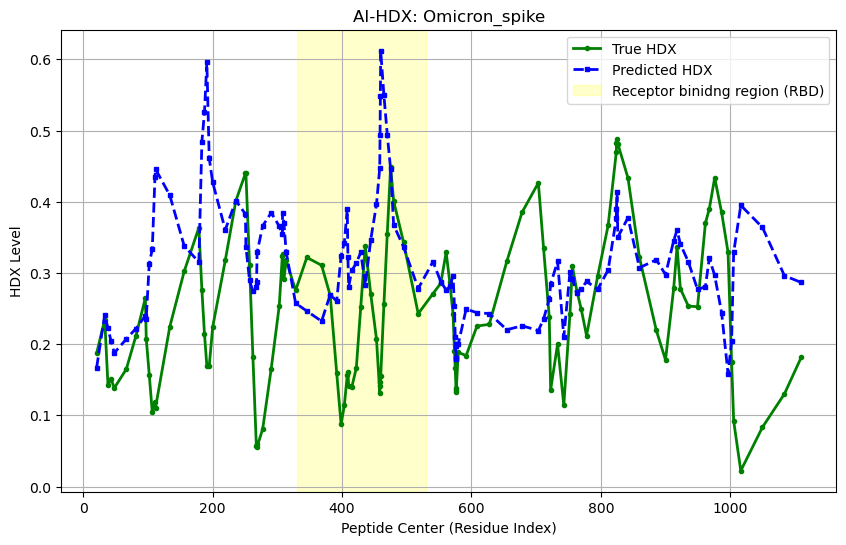

In [47]:
range_list = np.array(range_list).reshape(-1).reshape(-1, 2)
x_label = np.mean(range_list, axis=1)
y_true = np.array(truth_data)
y_pred = np.array(mean_pred)

### evaluation: HDX prediction vs truth line chart along peptide center ###
def slide_mean(data, window_size=3):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

y_true = slide_mean(y_true.flatten(), window_size=3)
y_pred = slide_mean(y_pred.flatten(), window_size=3)
x_label = slide_mean(x_label, window_size=3)
sort_index = np.argsort(x_label)
y_true, y_pred = y_true[sort_index], y_pred[sort_index]

plt.figure(figsize=(10, 6))
plt.plot(x_label[:-1], y_true[:-1], label='True HDX', color='green', marker='o', linestyle='-', linewidth=2, markersize=3)
plt.plot(x_label[:-1], y_pred[:-1], label='Predicted HDX', color='blue', marker='s', linestyle='--', linewidth=2, markersize=3)
plt.axvspan(330, 530, color='yellow', alpha=0.2, label = 'Receptor binidng region (RBD)')

plt.title('AI-HDX: Omicron_spike')  # Adding chart title
plt.xlabel('Peptide Center (Residue Index)')  # Labeling the x-axis
plt.ylabel('HDX Level')  # Labeling the y-axis
plt.legend(loc='best')  # Displaying the legend in the best location
plt.grid(True)  # Adding gridlines for better readability
plt.savefig('/home/lwang/models/HDX_LSTM/data/COVID_SPIKE/240409_AIHDX_OmicronSpike_linechart.png')  # Save the plot as a PNG file
#plt.show()